## Step 1: Importing 

In [165]:
#importing all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

In [166]:
#importing data and checing the top 5 rows
leads = pd.read_csv('Leads.csv')
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [167]:
#checking the shape
leads.shape

(9240, 37)

In [168]:
#checking the information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [169]:
#checking the summary
leads.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

## Step 2: Inspecting the Dataframe

In [170]:
#calculate % of null values in each columns
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads)

Total    Percent
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
Lead Profile                                    2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
How did you hear about X Education              2207  23.885281
Specialization                                  1438  15.562771
City                                            1420  15.367965
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

In [171]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Converting all the 'Select' into null values 

In [172]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [173]:
leads = leads.replace('Select',np.nan)

In [174]:
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [175]:
leads['Specialization'].isnull().sum()

3380

In [176]:
#calculate % of null values in each columns again
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads)

Total    Percent
How did you hear about X Education              7250  78.463203
Lead Profile                                    6855  74.188312
Lead Quality                                    4767  51.590909
Asymmetrique Profile Score                      4218  45.649351
Asymmetrique Activity Score                     4218  45.649351
Asymmetrique Profile Index                      4218  45.649351
Asymmetrique Activity Index                     4218  45.649351
City                                            3669  39.707792
Specialization                                  3380  36.580087
Tags                                            3353  36.287879
What matters most to you in choosing a course   2709  29.318182
What is your current occupation                 2690  29.112554
Country                                         2461  26.634199
TotalVisits                                      137   1.482684
Page Views Per Visit                             137   1.482684
Last Activity                                    103   1.114719
Lead Source                                       36   0.389610
Lead Origin                                        0   0.000000
Lead Number                                        0   0.000000
Do Not Email                                       0   0.000000
Do Not Call                                        0   0.000000
Converted                                          0   0.000000
Total Time Spent on Website                        0   0.000000
Last Notable Activity                              0   0.000000
Newspaper Article                                  0   0.000000
Search                                             0   0.000000
Magazine                                           0   0.000000
A free copy of Mastering The Interview             0   0.000000
X Education Forums                                 0   0.000000
Newspaper                                          0   0.000000
Digital Advertisement                              0   0.000000
Through Recommendations                            0   0.000000
Receive More Updates About Our Courses             0   0.000000
Update me on Supply Chain Content                  0   0.000000
Get updates on DM Content                          0   0.000000
I agree to pay the amount through cheque           0   0.000000
Prospect ID                                        0   0.000000

We can see that some variables have more than 30% of the entries null. So we can remove all the variables who's null value is more than or equal to 30%.
Variables having values null values less than 30%, we can try and impute those values

In [178]:
leads2 = leads.copy()

In [179]:
# droping all the coloumns with more than 30% of null values
nullCol = list(missing_values_leads[missing_values_leads.Percent>=30.00].index)
leads2=leads.drop(labels=nullCol,axis=1)

In [180]:
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [181]:
leads2.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9103.000000  
mean               2.362820  
std                2.161418  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.000000  
max               55.000000

In [182]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Lets look at `What matters most to you in choosing a course` 

In [183]:
#lets look at 'What matters most to you in choosing a course' variable
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

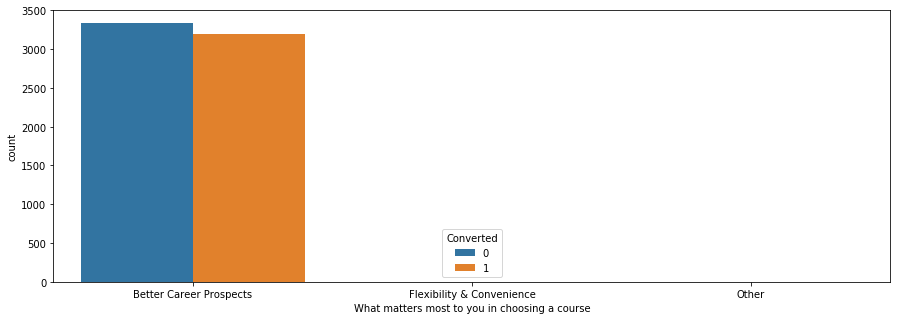

In [184]:
plt.figure(figsize=(15,5))
sns.countplot(leads2["What matters most to you in choosing a course"],hue=leads2.Converted)
plt.show()

since `What matters most to you in choosing a course` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Better Career Prospects'. So we will impute all the null values in this variable with 'Better Career Prospects' as it already have the highest selection.

In [185]:
leads2.loc[leads2["What matters most to you in choosing a course"].isnull(),"What matters most to you in choosing a course"]="Better Career Prospects"

In [186]:
leads2["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Lets look at `What is your current occupation` 

In [187]:
#lets look at 'What is your current occupation' variable
leads2["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

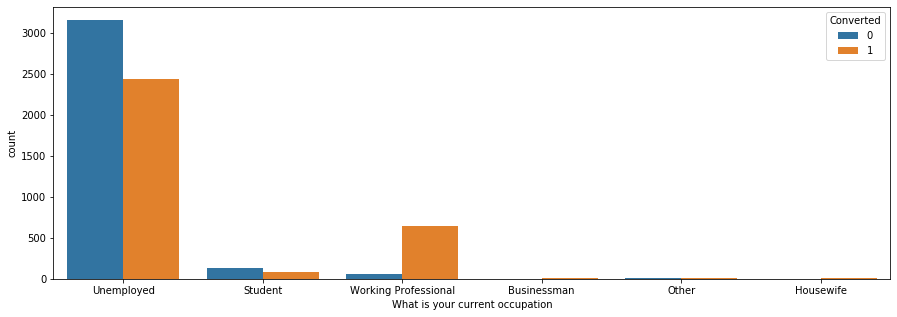

In [188]:
plt.figure(figsize=(15,5))
sns.countplot(leads2["What is your current occupation"],hue=leads2.Converted)
plt.show()

since `What is your current occupation` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Unemployed'. So we will impute all the null values in this variable with 'Unemployed' as it already have the highest selection.

In [189]:
leads2.loc[leads2["What is your current occupation"].isnull(),"What is your current occupation"]="Unemployed"

In [190]:
leads2["What is your current occupation"].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### Lets look at `Country` 

In [191]:
#lets look at 'Country' variable
leads2["Country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Italy                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
China                      2
Philippines                2
Belgium                    2
Ghana                      2
Switzerland                1
Indonesia                  1
Tanzania                   1
Sri Lanka                  1
Russia                     1
Liberia                    1
Kenya         

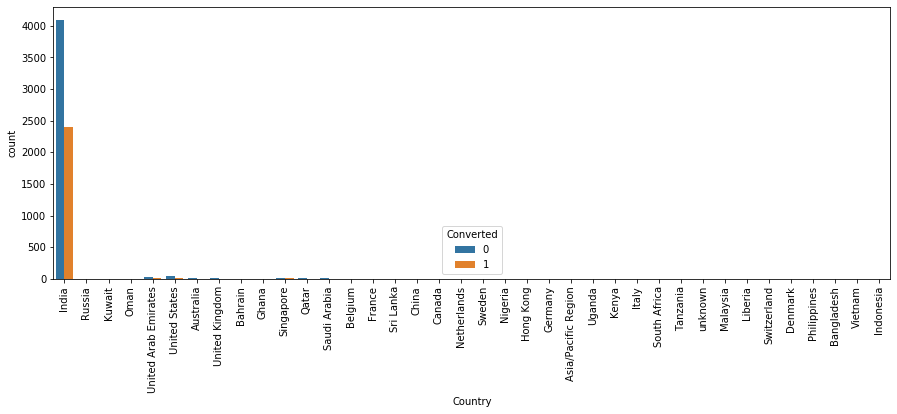

In [192]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Country"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Country` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'India'. So we will impute all the null values in this variable with 'India' as it already have the highest selection.

In [193]:
leads2.loc[leads2["Country"].isnull(),"Country"]="India"

In [194]:
leads2["Country"].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Italy                      2
Netherlands                2
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
China                      2
Philippines                2
Belgium                    2
Ghana                      2
Switzerland                1
Indonesia                  1
Tanzania                   1
Sri Lanka                  1
Russia                     1
Liberia                    1
Kenya         

#### Lets look at `TotalVisits` 

In [195]:
#lets look at 'TotalVisits' variable
leads2["TotalVisits"].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

since `TotalVisits` variable is numerical variable. We can go with either mean or median. 

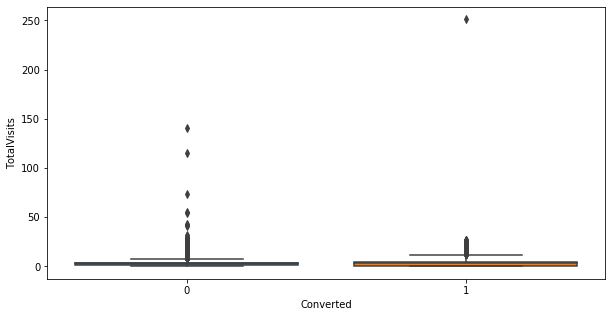

In [196]:
plt.figure(figsize=(10,5))
sns.boxplot(y = "TotalVisits",x="Converted",data=leads2)
plt.show()

Lets look at the outliers first

In [197]:
leads2["TotalVisits"].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [198]:
a = leads2[["TotalVisits",'Converted']]
a

TotalVisits  Converted
0             0.0          0
1             5.0          0
2             2.0          1
3             1.0          0
4             2.0          1
...           ...        ...
9235          8.0          1
9236          2.0          0
9237          2.0          0
9238          3.0          1
9239          6.0          1

[9240 rows x 2 columns]

In [199]:
a[a.Converted==1].value_counts()

TotalVisits  Converted
0.0          1            916
2.0          1            537
3.0          1            486
4.0          1            448
5.0          1            316
6.0          1            178
7.0          1            122
8.0          1            103
9.0          1             73
1.0          1             60
10.0         1             57
11.0         1             48
13.0         1             23
14.0         1             21
12.0         1             18
16.0         1             10
15.0         1              7
18.0         1              6
19.0         1              6
21.0         1              5
20.0         1              4
24.0         1              4
27.0         1              3
23.0         1              3
17.0         1              2
26.0         1              2
22.0         1              1
25.0         1              1
251.0        1              1
dtype: int64

In [200]:
a[(a.Converted==1) & (a.TotalVisits>20)]

TotalVisits  Converted
345          21.0          1
663          21.0          1
2154         23.0          1
2289         21.0          1
3315         24.0          1
5026         26.0          1
5078         21.0          1
5349         24.0          1
5723         21.0          1
5746         22.0          1
6102        251.0          1
6182         24.0          1
6702         26.0          1
6805         24.0          1
7421         27.0          1
7537         27.0          1
7547         23.0          1
8624         27.0          1
8684         23.0          1
9016         25.0          1

We can see that even when `TotalVisits` is at its maximum i.e. 251.0, that lead gets converted. So we can not remove these outliers

We will impute median instead of mean as the mean value is greater than mean. So imputing all the null values with median value i.e. 3.0.

In [201]:
leads2.loc[leads2["TotalVisits"].isnull(),"TotalVisits"]=3.0

In [202]:
leads2["TotalVisits"].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Lets look at `Page Views Per Visit` 

In [203]:
leads2['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

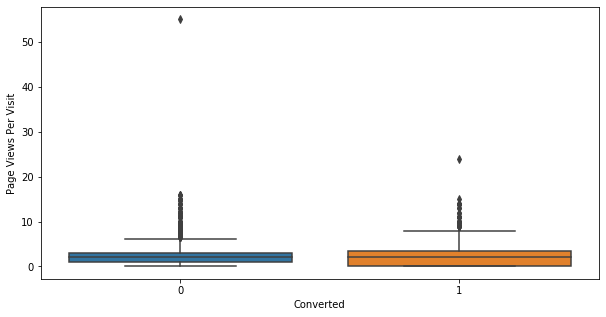

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(y= leads2['Page Views Per Visit'], x=leads2["Converted"])
plt.show()

Lets look at the outliers first

In [205]:
b=leads2[['Page Views Per Visit','Converted']]
b.groupby(['Converted']).count()

Page Views Per Visit
Converted                      
0                          5642
1                          3461

In [206]:
b[(b['Page Views Per Visit']>20) & (b['Converted']==1)]

Page Views Per Visit  Converted
6805                  24.0          1

We can see that a lead that has `page views per visit` equal to 24 gets converted. So we can not remove outliers. We will impute all the null values with median value i.e 2.0 as median is greater than mean

In [207]:
leads2.loc[leads2["Page Views Per Visit"].isnull(),"Page Views Per Visit"]=2.0

In [208]:
leads2["Page Views Per Visit"].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Lets look at `Last Activity` 

In [209]:
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

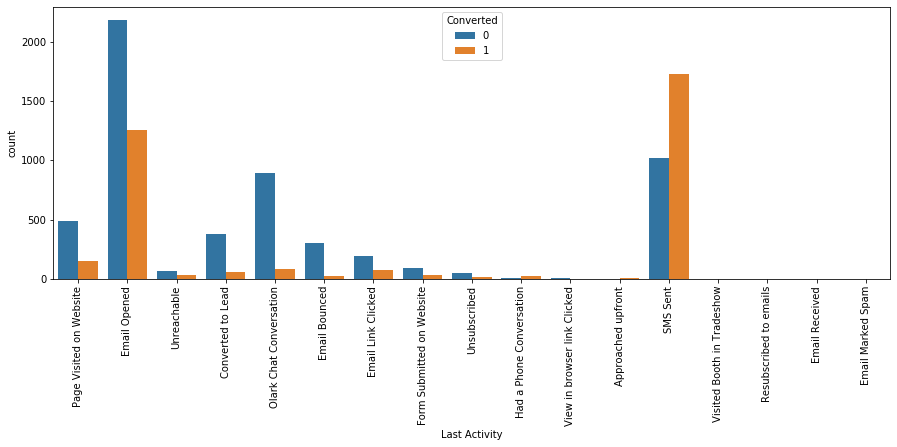

In [210]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Last Activity"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Last Activity` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'SMS Sent'. Since 'SMS Sent' has the highest number of conversion. So we will impute all the null values in this variable with 'SMS Sent'.

In [211]:
leads2.loc[leads2["Last Activity"].isnull(),"Last Activity"]="SMS Sent"

In [212]:
leads2["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2848
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

#### Lets look at `Lead Source` 

In [213]:
leads2["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

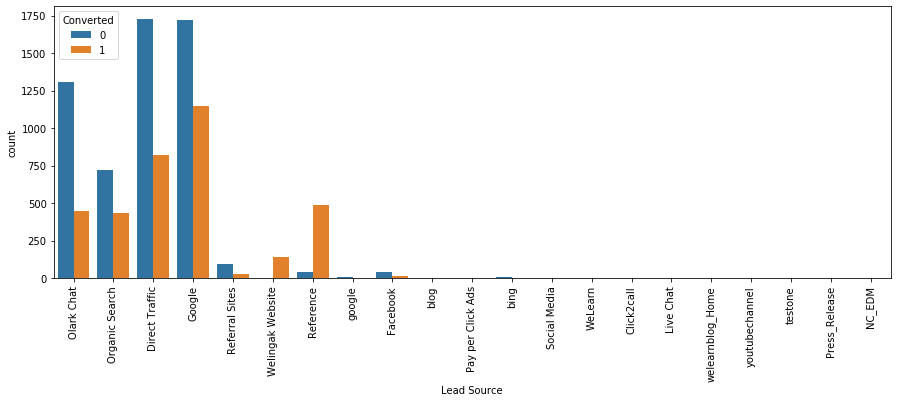

In [214]:
plt.figure(figsize=(15,5))
s = sns.countplot(leads2["Lead Source"],hue=leads2.Converted)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

since `Lead Source` variable is catagorical variable. We can not choose mean or median. So we have to go with mode. So highest mode is for 'Google'. So we will impute all the null values in this variable with 'Google' as it already have the highest selection.

In [215]:
leads2.loc[leads2["Lead Source"].isnull(),"Lead Source"]="Google"

In [216]:
leads2["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
blog                    1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

#### Checking the null values again

In [217]:
#calculate % of null values in each columns again
def null_values(apl):
    total = apl.isnull().sum().sort_values(ascending = False)
    percent = (apl.isnull().sum()/apl.isnull().count()*100).sort_values(ascending = False)
    missing_inp0  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_inp0

null_values(leads2)

Total  Percent
Last Notable Activity                              0      0.0
What is your current occupation                    0      0.0
Lead Number                                        0      0.0
Lead Origin                                        0      0.0
Lead Source                                        0      0.0
Do Not Email                                       0      0.0
Do Not Call                                        0      0.0
Converted                                          0      0.0
TotalVisits                                        0      0.0
Total Time Spent on Website                        0      0.0
Page Views Per Visit                               0      0.0
Last Activity                                      0      0.0
Country                                            0      0.0
What matters most to you in choosing a course      0      0.0
A free copy of Mastering The Interview             0      0.0
Search                                             0      0.0
Magazine                                           0      0.0
Newspaper Article                                  0      0.0
X Education Forums                                 0      0.0
Newspaper                                          0      0.0
Digital Advertisement                              0      0.0
Through Recommendations                            0      0.0
Receive More Updates About Our Courses             0      0.0
Update me on Supply Chain Content                  0      0.0
Get updates on DM Content                          0      0.0
I agree to pay the amount through cheque           0      0.0
Prospect ID                                        0      0.0

## Step 3: Data Preparation

In [218]:
#Checking the top5 rows of the data
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                 No   
1                          674                   2.5  ...                 No   
2                         1532                   2.0  ...                 No   
3                          305                   1.0  ...                 No   
4                         1428                   1.0  ...                 No   

  Newspaper Digital Advertisement Through Recommendations  \
0        No                    No                      No   
1        No                    No                      No   
2        No                    No                      No   
3        No                    No                      No   
4        No                    No                      No   

  Receive More Updates About Our Courses Update me on Supply Chain Content  \
0                                     No                                No   
1                                     No                                No   
2                                     No                                No   
3                                     No                                No   
4                                     No                                No   

  Get updates on DM Content I agree to pay the amount through cheque  \
0                        No                                       No   
1                        No                                       No   
2                        No                                       No   
3                        No                                       No   
4                        No                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 27 columns]

In [219]:
#Checking the shape
leads2.shape

(9240, 27)

In [220]:
#Converted Rate
Converted = (sum(leads2["Converted"])/len(leads2["Converted"].index))*100
Converted

38.53896103896104

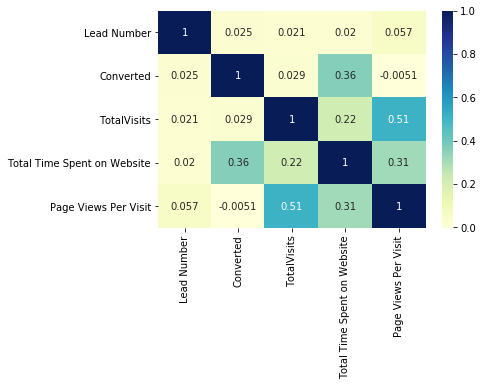

In [221]:
#heatmap
sns.heatmap(leads2.corr(),cmap="YlGnBu",annot=True)
plt.show()

#### Converting some binary variables (Yes/No) to 0/1

In [222]:
#columns in the leads2 dataframe
leads2.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [223]:
#all required variables
varlist = ['Do Not Email','Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the leads list
leads2[varlist] = leads2[varlist].apply(binary_map)

In [224]:
#head of lead2 again
leads2.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... X Education Forums  \
0                            0                   0.0  ...                  0   
1                          674                   2.5  ...                  0   
2                         1532                   2.0  ...                  0   
3                          305                   1.0  ...                  0   
4                         1428                   1.0  ...                  0   

  Newspaper Digital Advertisement Through Recommendations  \
0         0                     0                       0   
1         0                     0                       0   
2         0                     0                       0   
3         0                     0                       0   
4         0                     0                       0   

   Receive More Updates About Our Courses  Update me on Supply Chain Content  \
0                                       0                                  0   
1                                       0                                  0   
2                                       0                                  0   
3                                       0                                  0   
4                                       0                                  0   

   Get updates on DM Content  I agree to pay the amount through cheque  \
0                          0                                         0   
1                          0                                         0   
2                          0                                         0   
3                          0                                         0   
4                          0                                         0   

   A free copy of Mastering The Interview  Last Notable Activity  
0                                       0               Modified  
1                                       0           Email Opened  
2                                       1           Email Opened  
3                                       0               Modified  
4                                       0               Modified  

[5 rows x 27 columns]

In [225]:
#checking the shape again
leads2.shape

(9240, 27)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [226]:
#checking information
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   int64  
 5   Do Not Call                                    9240 non-null   int64  
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9240 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9240 

In [227]:
#converting lead number into object from int64
leads2['Lead Number']=leads2['Lead Number'].astype('object')

In [231]:
#all the categorical variable
cata_var = leads2.select_dtypes(exclude=['int64','float64'])
cata_var.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source            Last Activity Country  \
0      Olark Chat  Page Visited on Website   India   
1  Organic Search             Email Opened   India   
2  Direct Traffic             Email Opened   India   
3  Direct Traffic              Unreachable   India   
4          Google        Converted to Lead   India   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Last Notable Activity  
0                       Better Career Prospects              Modified  
1                       Better Career Prospects          Email Opened  
2                       Better Career Prospects          Email Opened  
3                       Better Career Prospects              Modified  
4                       Better Career Prospects              Modified

In [232]:
#droping 'Prospect ID','Lead Number' from cata_var as they are unique categories
cata_var.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [233]:
#checking columns in cata_var
cata_var.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity'],
      dtype='object')

In [235]:
#creating dummy variables of all categorical variables excluding Country
dummy_var = pd.get_dummies(cata_var[['Lead Origin', 'Lead Source', 'Last Activity','What is your current occupation',
       'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

#concatinating dummy variables to leads2
leads2 = pd.concat([leads2,dummy_var],axis=1)

In [236]:
#creating dummy variables of all categorical variables
dummy = pd.get_dummies(cata_var.Country,prefix='Country')
dummy.drop(['Country_Malaysia'],axis=1)

#concatinating dummy variables to leads2
leads2 = pd.concat([leads2,dummy],axis=1)

In [237]:
#checking head again
leads2.head()

Prospect ID Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852      660681  Landing Page Submission   

      Lead Source  Do Not Email  Do Not Call  Converted  TotalVisits  \
0      Olark Chat             0            0          0          0.0   
1  Organic Search             0            0          0          5.0   
2  Direct Traffic             0            0          1          2.0   
3  Direct Traffic             0            0          0          1.0   
4          Google             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ... Country_Sri Lanka  \
0                            0                   0.0  ...                 0   
1                          674                   2.5  ...                 0   
2                         1532                   2.0  ...                 0   
3                          305                   1.0  ...                 0   
4                         1428                   1.0  ...                 0   

  Country_Sweden Country_Switzerland Country_Tanzania  Country_Uganda  \
0              0                   0                0               0   
1              0                   0                0               0   
2              0                   0                0               0   
3              0                   0                0               0   
4              0                   0                0               0   

   Country_United Arab Emirates  Country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 127 columns]

In [238]:
#checking shape again
leads2.shape

(9240, 127)

#### Dropping the repeated variables

In [239]:
#droping the related variables
leads2.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'Last Notable Activity','Country'],axis=1,inplace=True)

In [240]:
leads2.head()

Prospect ID Lead Number  Do Not Email  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620      660737             0   
1  2a272436-5132-4136-86fa-dcc88c88f482      660728             0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a      660727             0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc      660719             0   
4  3256f628-e534-4826-9d63-4a8b88782852      660681             0   

   Do Not Call  Converted  TotalVisits  Total Time Spent on Website  \
0            0          0          0.0                            0   
1            0          0          5.0                          674   
2            0          1          2.0                         1532   
3            0          0          1.0                          305   
4            0          1          2.0                         1428   

   Page Views Per Visit  Search  Magazine  ...  Country_Sri Lanka  \
0                   0.0       0         0  ...                  0   
1                   2.5       0         0  ...                  0   
2                   2.0       0         0  ...                  0   
3                   1.0       0         0  ...                  0   
4                   1.0       0         0  ...                  0   

   Country_Sweden  Country_Switzerland  Country_Tanzania  Country_Uganda  \
0               0                    0                 0               0   
1               0                    0                 0               0   
2               0                    0                 0               0   
3               0                    0                 0               0   
4               0                    0                 0               0   

   Country_United Arab Emirates  Country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 120 columns]

In [241]:
leads2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 120 entries, Prospect ID to Country_unknown
dtypes: float64(2), int64(16), object(2), uint8(100)
memory usage: 2.3+ MB


## Step 4: Test-Train Split

In [242]:
# Putting feature variable to X
X = leads2.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Magazine  Newspaper Article  \
0                   0.0       0         0                  0   
1                   2.5       0         0                  0   
2                   2.0       0         0                  0   
3                   1.0       0         0                  0   
4                   1.0       0         0                  0   

   X Education Forums  Newspaper  ...  Country_Sri Lanka  Country_Sweden  \
0                   0          0  ...                  0               0   
1                   0          0  ...                  0               0   
2                   0          0  ...                  0               0   
3                   0          0  ...                  0               0   
4                   0          0  ...                  0               0   

   Country_Switzerland  Country_Tanzania  Country_Uganda  \
0                    0                 0               0   
1                    0                 0               0   
2                    0                 0               0   
3                    0                 0               0   
4                    0                 0               0   

   Country_United Arab Emirates  Country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   Country_United States  Country_Vietnam  Country_unknown  
0                      0                0                0  
1                      0                0                0  
2                      0                0                0  
3                      0                0                0  
4                      0                0                0  

[5 rows x 117 columns]

In [243]:
# Putting response variable to y
y = leads2['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [244]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 5: Feature Scaling

In [245]:
#scaling
scaler = StandardScaler()

#scaling the requred variables
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
1871             0            0    -0.656434                    -0.885371   
6795             0            0     0.100767                     0.005716   
3516             0            0     0.290067                    -0.691418   
8105             0            0     0.290067                     1.365219   
3934             0            0    -0.656434                    -0.885371   

      Page Views Per Visit  Search  Magazine  Newspaper Article  \
1871             -1.085519       0         0                  0   
6795             -0.470569       0         0                  0   
3516              0.070401       0         0                  0   
8105              1.226321       0         0                  0   
3934             -1.085519       0         0                  0   

      X Education Forums  Newspaper  ...  Country_Sri Lanka  Country_Sweden  \
1871                   0          0  ...                  0               0   
6795                   0          0  ...                  0               0   
3516                   0          0  ...                  0               0   
8105                   0          0  ...                  0               0   
3934                   0          0  ...                  0               0   

      Country_Switzerland  Country_Tanzania  Country_Uganda  \
1871                    0                 0               0   
6795                    0                 0               0   
3516                    0                 0               0   
8105                    0                 0               0   
3934                    0                 0               0   

      Country_United Arab Emirates  Country_United Kingdom  \
1871                             0                       0   
6795                             0                       0   
3516                             0                       0   
8105                             0                       0   
3934                             0                       0   

      Country_United States  Country_Vietnam  Country_unknown  
1871                      0                0                0  
6795                      0                0                0  
3516                      0                0                0  
8105                      0                0                0  
3934                      0                0                0  

[5 rows x 117 columns]

In [246]:
# Checking the Converted Rate
conver = 100*(sum(leads2['Converted'])/len(leads2['Converted'].index))
conver

38.53896103896104

We have almost 39% of converted rate right now

## Step 6: Looking at Correlations

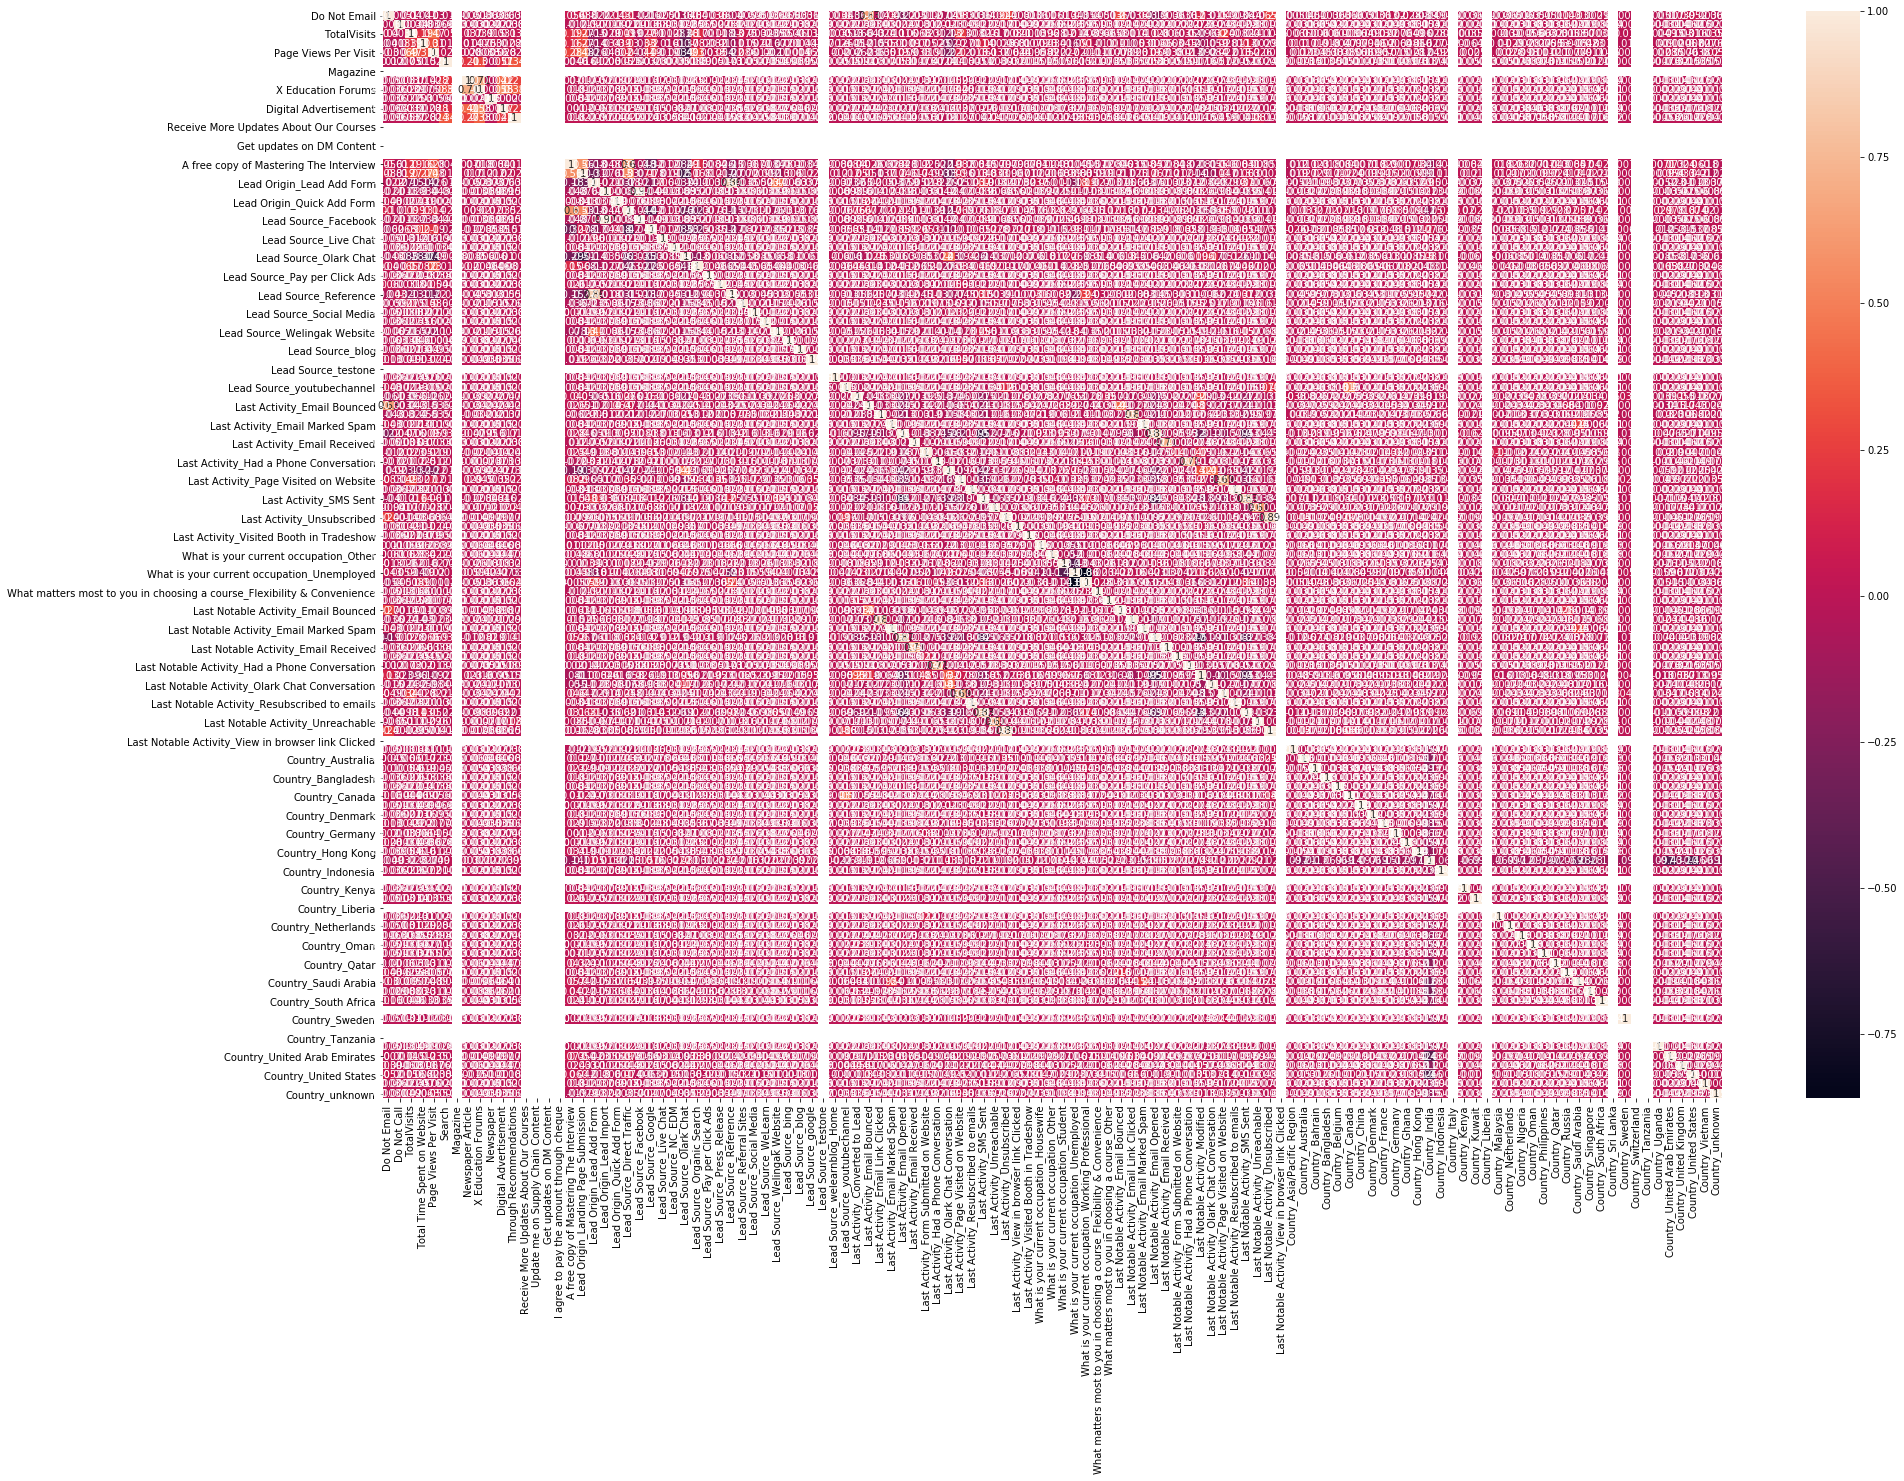

In [247]:
#heat map
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [273]:
X_train.corr()[['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked','Country_Italy','Country_Liberia','Country_Sri Lanka',
                'Country_Switzerland','Country_Tanzania']]


Receive More Updates About Our Courses  \
Do Not Email                                                     NaN   
Do Not Call                                                      NaN   
TotalVisits                                                      NaN   
Total Time Spent on Website                                      NaN   
Page Views Per Visit                                             NaN   
...                                                              ...   
Country_United Arab Emirates                                     NaN   
Country_United Kingdom                                           NaN   
Country_United States                                            NaN   
Country_Vietnam                                                  NaN   
Country_unknown                                                  NaN   

                              I agree to pay the amount through cheque  \
Do Not Email                                                       NaN   
Do Not Call                                                        NaN   
TotalVisits                                                        NaN   
Total Time Spent on Website                                        NaN   
Page Views Per Visit                                               NaN   
...                                                                ...   
Country_United Arab Emirates                                       NaN   
Country_United Kingdom                                             NaN   
Country_United States                                              NaN   
Country_Vietnam                                                    NaN   
Country_unknown                                                    NaN   

                              Magazine  Get updates on DM Content  \
Do Not Email                       NaN                        NaN   
Do Not Call                        NaN                        NaN   
TotalVisits                        NaN                        NaN   
Total Time Spent on Website        NaN                        NaN   
Page Views Per Visit               NaN                        NaN   
...                                ...                        ...   
Country_United Arab Emirates       NaN                        NaN   
Country_United Kingdom             NaN                        NaN   
Country_United States              NaN                        NaN   
Country_Vietnam                    NaN                        NaN   
Country_unknown                    NaN                        NaN   

                              Lead Source_testone  \
Do Not Email                                  NaN   
Do Not Call                                   NaN   
TotalVisits                                   NaN   
Total Time Spent on Website                   NaN   
Page Views Per Visit                          NaN   
...                                           ...   
Country_United Arab Emirates                  NaN   
Country_United Kingdom                        NaN   
Country_United States                         NaN   
Country_Vietnam                               NaN   
Country_unknown                               NaN   

                              Update me on Supply Chain Content  \
Do Not Email                                                NaN   
Do Not Call                                                 NaN   
TotalVisits                                                 NaN   
Total Time Spent on Website                                 NaN   
Page Views Per Visit                                        NaN   
...                                                         ...   
Country_United Arab Emirates                                NaN   
Country_United Kingdom                                      NaN   
Country_United States                                       NaN   
Country_Vietnam                                             NaN   
Country_unknown                                             NaN   

     

In [274]:
#Droping these non related variables
X_train.drop(['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked','Country_Italy','Country_Liberia','Country_Sri Lanka',
                'Country_Switzerland','Country_Tanzania'],axis=1,inplace=True)

X_test.drop(['Receive More Updates About Our Courses', 'I agree to pay the amount through cheque', 'Magazine', 
                'Get updates on DM Content', 'Lead Source_testone', 'Update me on Supply Chain Content',
                'Last Notable Activity_View in browser link Clicked','Country_Italy','Country_Liberia','Country_Sri Lanka',
                'Country_Switzerland','Country_Tanzania'],axis=1,inplace=True)

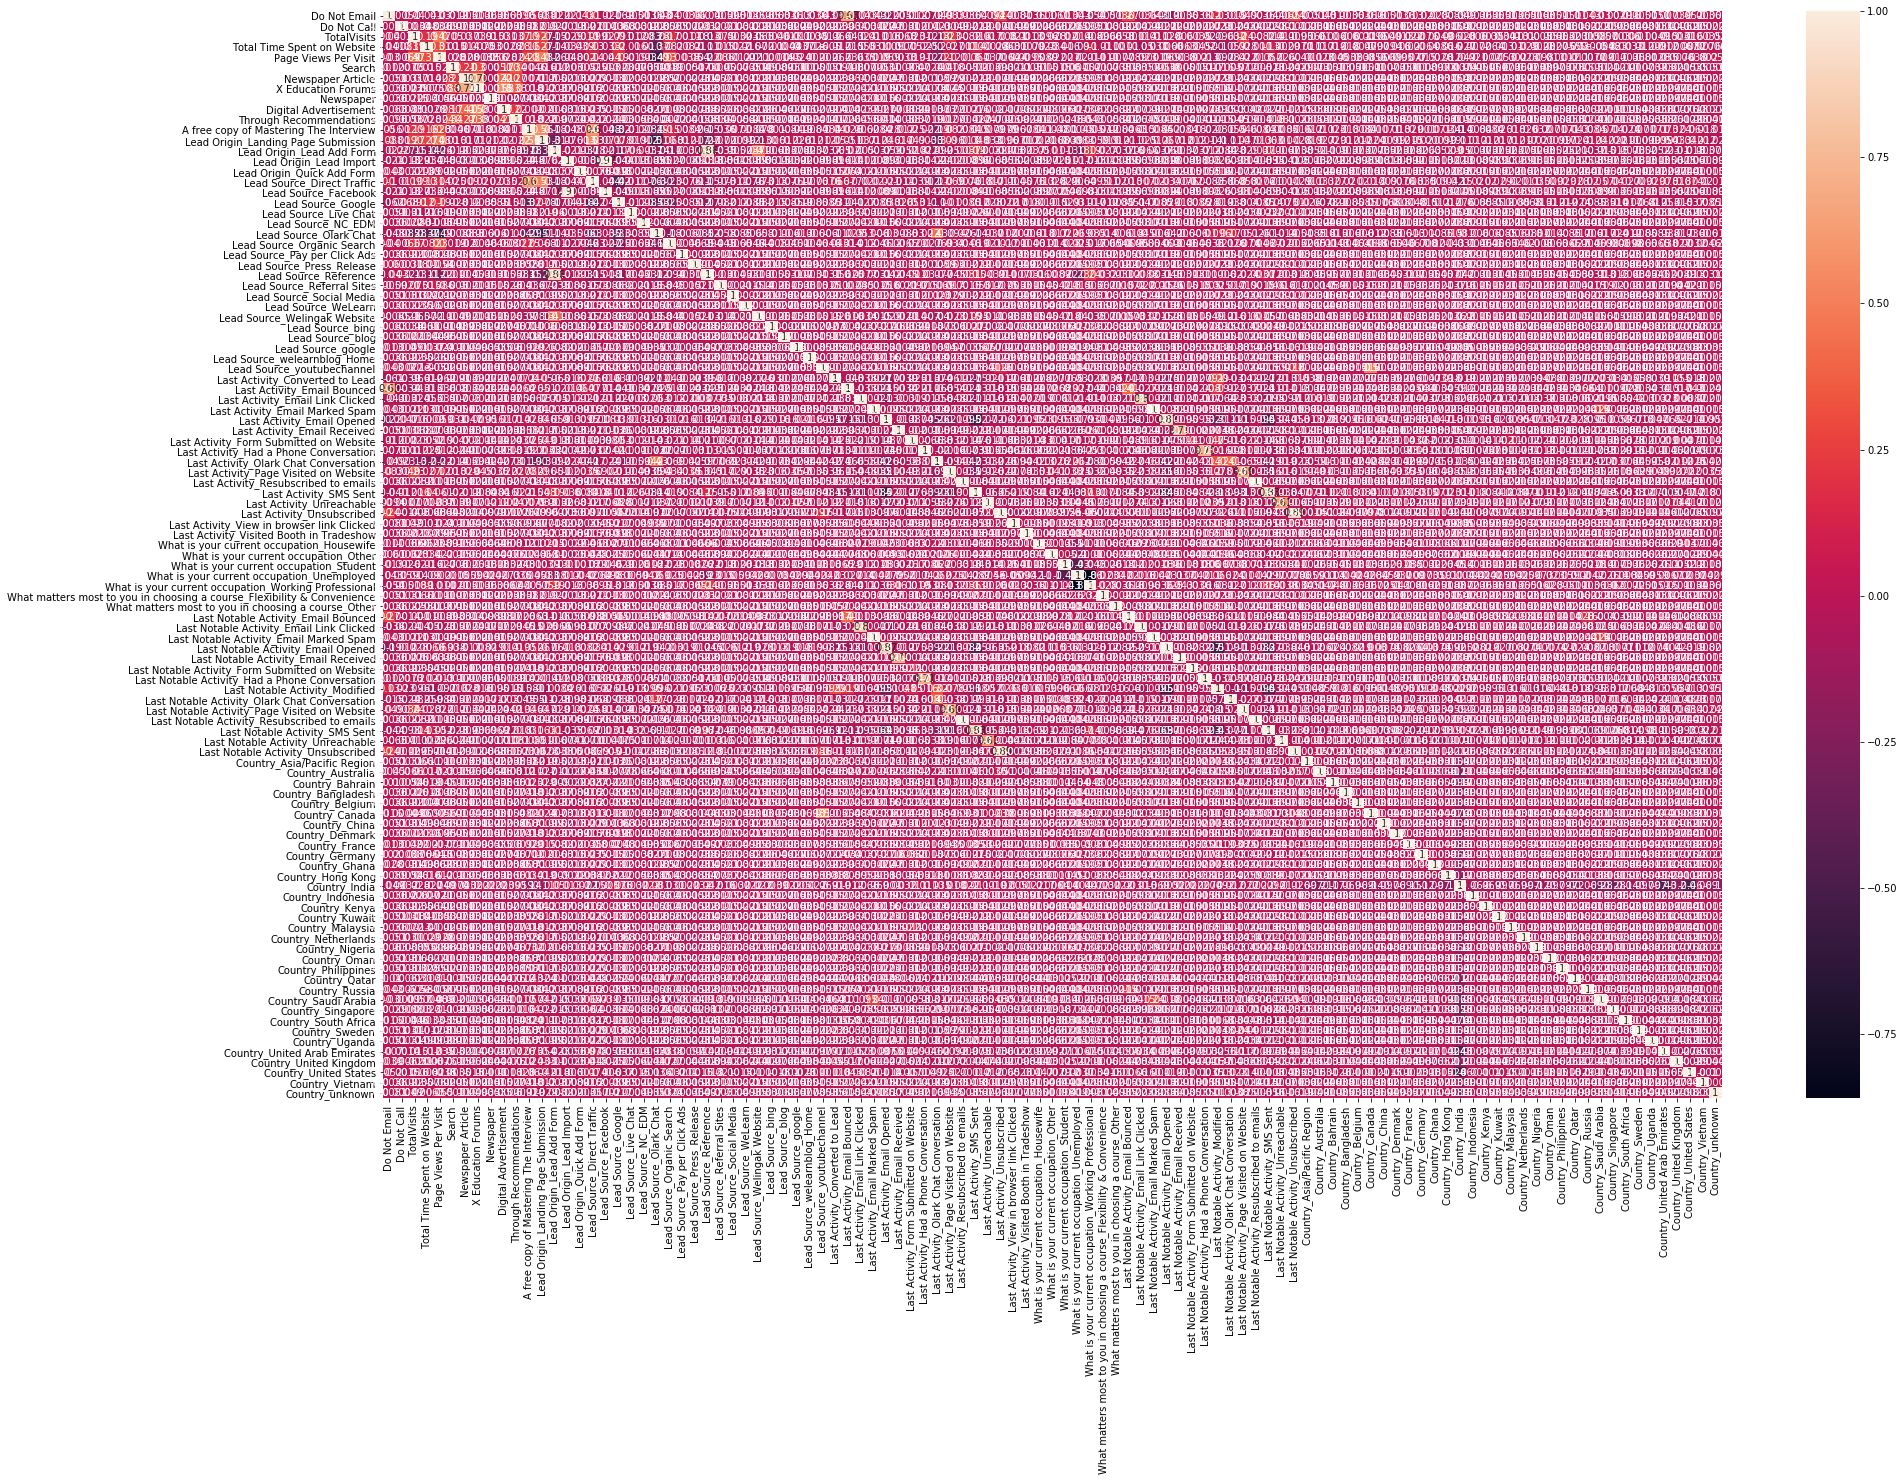

In [275]:
#heatmap again
plt.figure(figsize=(30,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

## Step 7: Model Building
Let's start by splitting our data into a training set and a test set.

#### Running Your First Training Model

In [277]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6366
Model Family:                Binomial   Df Model:                          101
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 07 Jan 2021   Deviance:                          nan
Time:                        16:47:17   Pearson chi2:                 7.20e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    4.151e+15   5.15e+07   8.06e+07      0.000    4.15e+15    4.15e+15
Do Not Email                                                             -6.37e+14   4.44e+06  -1.43e+08      0.000   -6.37e+14   -6.37e+14
Do Not Call                                                               5.48e+15   4.76e+07   1.15e+08      0.000    5.48e+15    5.48e+15
TotalVisits                                                              6.769e+13   9.94e+05   6.81e+07      0.000    6.77e+13    6.77e+13
Total Time Spent on Website                                              4.144e+13    9.5e+05   4.36e+07      0.000    4.14e+13    4.14e+13
Page Views Per Visit                                                     2.732e+13    1.2e+06   2.28e+07      0.000    2.73e+13    2.73e+13
Search                                                                  -8.229e+14    2.2e+07  -3.73e+07      0.000   -8.23e+14   -8.23e+14
Newspaper Article                                                        5.241e+15   6.73e+07   7.79e+07      0.000    5.24e+15    5.24e+15
X Education Forums                                                      -4.007e+15   1.11e+08  -3.61e+07      0.000   -4.01e+15   -4.01e+15
Newspaper                                                               -4.073e+15   6.72e+07  -6.06e+07      0.000   -4.07e+15   -4.07e+15
Digital Advertisement                                                   -4.814e+15   4.76e+07  -1.01e+08      0.000   -4.81e+15   -4.81e+15
Through Recommendations                                                  5.213e+14   2.86e+07   1.83e+07      0.000    5.21e+14    5.21e+14
A free copy of Mastering The Interview                                   8.876e+13   2.61e+06    3.4e+07      0.000    8.88e+13    8.88e+13
Lead Origin_Landing Page Submission                                     -6.978e+13   2.66e+06  -2.62e+07      0.000   -6.98e+13   -6.98e+13
Lead Origin_Lead Add Form                                                1.402e+14    1.3e+07   1.08e+07      0.000     1.4e+14     1.4e+14
Lead Origin_Lead Import                                                  2.394e+14   4.87e+07   4.91e+06      0.000    2.39e+14    2.39e+14
Lead Origin_Quick Add Form                                               5.991e+15   6.74e+07   8.89e+07      0.000    5.99e+15    5.99e+15
Lead Source_Direct Traffic                                              -2.107e+15   4.09e+07  -5.14e+07      0.000   -2.11e+15   -2.11e+15
Lead Source_Facebook                                                    -2.164e+15   6.36e+07   -3.4e+07      0.000   -2.16e+15   -2.16e+15
Lea

## Step 8: Feature Selection Using RFE

In [278]:
logreg = LogisticRegression()

In [279]:
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [280]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
        True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False])

In [281]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 9),
 ('TotalVisits', False, 70),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 73),
 ('Search', False, 38),
 ('Newspaper Article', False, 44),
 ('X Education Forums', False, 61),
 ('Newspaper', False, 6),
 ('Digital Advertisement', False, 3),
 ('Through Recommendations', False, 32),
 ('A free copy of Mastering The Interview', False, 91),
 ('Lead Origin_Landing Page Submission', False, 58),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 60),
 ('Lead Origin_Quick Add Form', False, 27),
 ('Lead Source_Direct Traffic', False, 36),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 51),
 ('Lead Source_Live Chat', False, 67),
 ('Lead Source_NC_EDM', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Pay per Click Ads', False, 66),
 ('Lead Source_Press_Release', False, 56),
 ('Lead Source_Reference', False, 

In [282]:
col = X_train.columns[rfe.support_]

In [283]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       

##### Assessing the model with StatsModels

In [284]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2691.9
Date:                Thu, 07 Jan 2021   Deviance:                       5383.8
Time:                        16:48:04   Pearson chi2:                 7.35e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3789      0.052    -26.740      0.000      -1.480      -1.278
Do Not Email                                            -1.1294      0.190     -5.955      0.000      -1.501      -0.758
Total Time Spent on Website                              1.0966      0.039     27.901      0.000       1.020       1.174
Lead Origin_Lead Add Form                                3.6901      0.190     19.387      0.000       3.317       4.063
Lead Source_Olark Chat                                   1.1387      0.102     11.167      0.000       0.939       1.339
Lead Source_Welingak Website                             1.9248      0.743      2.592      0.010       0.469       3.380
Last Activity_Converted to Lead                         -1.2602      0.218     -5.781      0.000      -1.687      -0.833
Last Activity_Email Bounced                             -1.5602      0.422     -3.697      0.000      -2.387      -0.733
Last Activity_Olark Chat Conversation                   -1.3884      0.163     -8.530      0.000      -1.707      -1.069
What is your current occupation_Housewife               23.9347   2.25e+04      0.001      0.999   -4.42e+04    4.42e+04
What is your current occupation_Working Professional     2.7978      0.187     14.938      0.000       2.431       3.165
Last Notable Activity_Email Bounced                      1.8543      0.602      3.079      0.002       0.674       3.035
Last Notable Activity_Had a Phone Conversation           3.5962      1.098      3.274      0.001       1.443       5.749
Last Notable Activity_SMS Sent                           1.4624      0.079     18.537      0.000       1.308       1.617
Last Notable Activity_Unreachable                        1.7737      0.513      3.458      0.001       0.768       2.779
Country_Qatar                                          -23.2957    2.4e+04     -0.001      0.999   -4.71e+04     4.7e+04
========================================================================================================================
"""

In [285]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.229521
6795    0.202201
3516    0.269268
8105    0.829286
3934    0.229521
4844    0.992783
3297    0.101636
8071    0.992016
987     0.121884
7423    0.904540
dtype: float64

In [286]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22952051, 0.20220089, 0.26926818, 0.82928566, 0.22952051,
       0.99278309, 0.10163565, 0.99201606, 0.12188416, 0.90453966])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [287]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Converted  Convert_Prob  CustID
0          0      0.229521    1871
1          0      0.202201    6795
2          0      0.269268    3516
3          0      0.829286    8105
4          0      0.229521    3934

##### Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

In [288]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted
0          0      0.229521    1871          0
1          0      0.202201    6795          0
2          0      0.269268    3516          0
3          0      0.829286    8105          1
4          0      0.229521    3934          0

In [289]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3545  457]
 [ 739 1727]]


In [290]:
# Predicted     not_churn    churn
# Actual
# not_churn        3542      460
# churn            746       1720

In [291]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8150896722325294


#### Checking VIFs

In [292]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6                         Last Activity_Email Bounced  1.94
0                                        Do Not Email  1.77
3                              Lead Source_Olark Chat  1.54
2                           Lead Origin_Lead Add Form  1.40
7               Last Activity_Olark Chat Conversation  1.36
4                        Lead Source_Welingak Website  1.24
1                         Total Time Spent on Website  1.22
10                Last Notable Activity_Email Bounced  1.21
12                     Last Notable Activity_SMS Sent  1.18
9   What is your current occupation_Working Profes...  1.16
5                     Last Activity_Converted to Lead  1.00
8           What is your current occupation_Housewife  1.00
11     Last Notable Activity_Had a Phone Conversation  1.00
13                  Last Notable Activity_Unreachable  1.00
14                                      Country_Qatar  1.00

All variables have a good value of VIF. So we need not drop any variables and we can proceed with making predictions using this model only

## Metrics beyond simply accuracy

In [293]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [294]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7003244120032441

In [295]:
# Let us calculate specificity
TN / float(TN+FP)

0.8858070964517741

In [296]:
# Calculate false postive rate - predicting converted when customer does not get converted
print(FP/ float(TN+FP))

0.1141929035482259


In [297]:
# positive predictive value 
print (TP / float(TP+FP))

0.7907509157509157


In [298]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8274976657329598


## Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [299]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [300]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Convert_Prob, drop_intermediate = False )

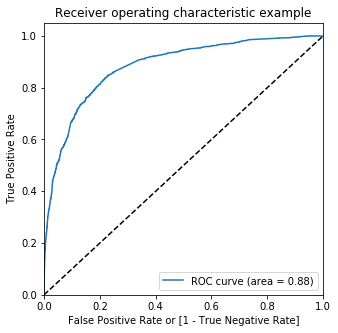

In [301]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

the ROC curve shows the trade-off between True Positive Rate and False Positive Rate which essentially can also be viewed as a tradeoff between Sensitivity and Specificity. As you can see, on the Y-axis, you have the values of Sensitivity and on the X-axis, you have the value of (1 - Specificity). Notice that in the curve when Sensitivity is increasing, (1 - Specificity), And since, (1 - Specificity) is increasing, it simply means that Specificity is decreasing. 

## Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [302]:
# Let's create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.35  0.4  \
0          0      0.229521    1871          0    1    1    1    0     0    0   
1          0      0.202201    6795          0    1    1    1    0     0    0   
2          0      0.269268    3516          0    1    1    1    0     0    0   
3          0      0.829286    8105          1    1    1    1    1     1    1   
4          0      0.229521    3934          0    1    1    1    0     0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    0    0    0    0    0

In [303]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.35,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.381262  1.000000  0.000000
0.10  0.10  0.591373  0.968775  0.358821
0.20  0.20  0.743352  0.912003  0.639430
0.30  0.30  0.801484  0.838200  0.778861
0.35  0.35  0.807823  0.806164  0.808846
0.40  0.40  0.812152  0.769262  0.838581
0.50  0.50  0.815090  0.700324  0.885807
0.60  0.60  0.796382  0.587997  0.924788
0.70  0.70  0.783859  0.516221  0.948776
0.80  0.80  0.750618  0.389294  0.973263
0.90  0.90  0.715986  0.273723  0.988506


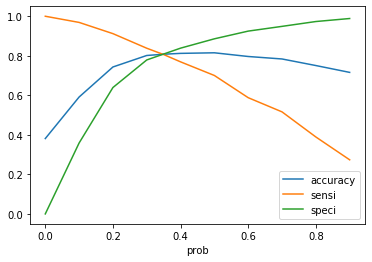

In [304]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [305]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

Converted  Convert_Prob  CustID  predicted  0.0  0.1  0.2  0.3  0.35  0.4  \
0          0      0.229521    1871          0    1    1    1    0     0    0   
1          0      0.202201    6795          0    1    1    1    0     0    0   
2          0      0.269268    3516          0    1    1    1    0     0    0   
3          0      0.829286    8105          1    1    1    1    1     1    1   
4          0      0.229521    3934          0    1    1    1    0     0    0   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                0  
3    1    1    1    1    0                1  
4    0    0    0    0    0                0

In [306]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8078231292517006

In [307]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3237,  765],
       [ 478, 1988]], dtype=int64)

In [308]:
# Predicted     not_churn    churn
# Actual
# not_churn        3242      760
# churn            491       1975

In [309]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [310]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8061638280616383

In [311]:
# Let us calculate specificity
TN / float(TN+FP)

0.8088455772113943

In [312]:
# Calculate false postive rate - predicting Converted when customer does not get Converted
print(FP/ float(TN+FP))

0.1911544227886057


In [313]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7221213221939702


In [314]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8713324360699866


## Precision and Recall

In [315]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3545,  457],
       [ 739, 1727]], dtype=int64)

##### Precision
TP / TP + FP

In [316]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7907509157509157

##### Recall
TP / TP + FN

In [317]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7003244120032441

Using sklearn utilities for the same

In [318]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7907509157509157

In [319]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7003244120032441

### Precision and recall tradeoff

In [320]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [321]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Convert_Prob)

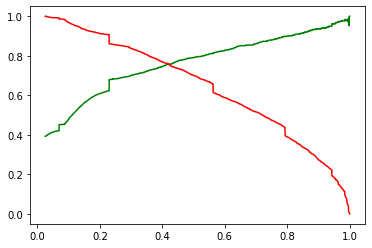

In [322]:
plt.plot(thresholds, p[:-1], "g-")  #precision
plt.plot(thresholds, r[:-1], "r-")  #recall
plt.show()

## Step 11: Making predictions on the test set

In [323]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [324]:
X_test = X_test[col]
X_test.head()

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4269             0                     0.964504                          0   
2376             0                    -0.885371                          1   
7766             0                    -0.777416                          0   
9199             0                    -0.885371                          0   
4359             0                    -0.885371                          1   

      Lead Source_Olark Chat  Lead Source_Welingak Website  \
4269                       0                             0   
2376                       0                             0   
7766                       0                             0   
9199                       1                             0   
4359                       0                             0   

      Last Activity_Converted to Lead  Last Activity_Email Bounced  \
4269                                0                            0   
2376                                0                            0   
7766                                0                            0   
9199                                0                            0   
4359                                0                            0   

      Last Activity_Olark Chat Conversation  \
4269                                      0   
2376                                      0   
7766                                      0   
9199                                      1   
4359                                      0   

      What is your current occupation_Housewife  \
4269                                          0   
2376                                          0   
7766                                          0   
9199                                          0   
4359                                          0   

      What is your current occupation_Working Professional  \
4269                                                  0      
2376                                                  0      
7766                                                  1      
9199                                                  0      
4359                                                  0      

      Last Notable Activity_Email Bounced  \
4269                                    0   
2376                                    0   
7766                                    0   
9199                                    0   
4359                                    0   

      Last Notable Activity_Had a Phone Conversation  \
4269                                               0   
2376                                               0   
7766                                               0   
9199                                               0   
4359                                               0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
4269                               1                                  0   
2376                               1                                  0   
7766                               0                                  1   
9199                               0                                  0   
4359                               0                                  0   

      Country_Qatar  
4269              0  
2376              0  
7766              0  
9199              0  
4359              0

In [325]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [326]:
y_test_pred = res.predict(X_test_sm)

In [327]:
y_test_pred[:10]

4269    0.757893
2376    0.942824
7766    0.912144
9199    0.069173
4359    0.792548
9186    0.584336
1631    0.421356
8963    0.140396
8007    0.051186
5324    0.362089
dtype: float64

In [328]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [329]:
# Let's see the head
y_pred_1.head()

0
4269  0.757893
2376  0.942824
7766  0.912144
9199  0.069173
4359  0.792548

In [330]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [331]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [332]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [333]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [334]:
y_pred_final.head()

Converted  CustID         0
0          1    4269  0.757893
1          1    2376  0.942824
2          1    7766  0.912144
3          0    9199  0.069173
4          1    4359  0.792548

In [335]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [336]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Convert_Prob'], axis=1)

In [337]:
# Let's see the head of y_pred_final
y_pred_final.head()

CustID  Converted  Convert_Prob
0    4269          1      0.757893
1    2376          1      0.942824
2    7766          1      0.912144
3    9199          0      0.069173
4    4359          1      0.792548

In [338]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [339]:
y_pred_final.head()

CustID  Converted  Convert_Prob  final_predicted
0    4269          1      0.757893                1
1    2376          1      0.942824                1
2    7766          1      0.912144                1
3    9199          0      0.069173                0
4    4359          1      0.792548                1

In [340]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8163780663780664

In [341]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1381,  296],
       [ 213,  882]], dtype=int64)

In [342]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [343]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8054794520547945

In [344]:
# Let us calculate specificity
TN / float(TN+FP)

0.8234943351222421

In [346]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7487266553480475

In [347]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8054794520547945

## Observation:
After running the model on the Train and Test data we have these final observations:

##### Train Data: 
- Accuracy: 80.78%
- Sensitivity: 80.82%
- Specificity: 80.88%

##### Test Data:
- Accuracy: 81.64%
- Sensitivity: 80.55%
- Specificity: 82.35%

The Model seems to predict the Conversion Rate within our required range and we can give the CEO confidence for making good calls on the basis of this model. 